In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pip install pandas openpyxl
import pandas as pd
import re

CSV_PATH  = "dataset_prior.csv"
XLSX_PATH = "LW_monthly.xlsx"
OUT_PATH  = "dataset.csv"

# 1) 읽기
ds = pd.read_csv(CSV_PATH)            # 'Time'이 기준 키
lw = pd.read_excel(XLSX_PATH, sheet_name=0)

# 2) LW: 첫 열을 날짜 키로 사용, 나머지에서 1~360m 컬럼만 선택 (원래 이름 유지)
date_col_lw = lw.columns[0]
maturity_pairs = []
for c in lw.columns[1:]:
    s = str(c).lower().strip()
    m = re.search(r"(\d{1,3})\s*m", s)   # '1 m', '1m', '12M' 등
    if m:
        k = int(m.group(1))
        if 1 <= k <= 360:
            maturity_pairs.append((k, c))
maturity_pairs.sort(key=lambda x: x[0])  # 만기 오름차순
lw_keep = [date_col_lw] + [c for _, c in maturity_pairs]
lw_sub = lw[lw_keep].copy()

# 3) 머지 (dataset을 기준으로 left join)
#    이름 충돌을 피하려고, 겹치는 컬럼은 LW 쪽에만 '_LW' 접미사를 붙이도록 설정
merged = ds.merge(lw_sub, left_on="Time", right_on=date_col_lw, how="left", suffixes=("", "_LW"))

# 4) 최종 컬럼 순서: dataset 원래 컬럼들 먼저, 그 뒤에 LW 컬럼들(충돌 시 실제 생긴 이름 사용)
ds_cols = list(ds.columns)

# right_on으로 들어온 LW의 날짜키는 필요 없으니 제거
if date_col_lw in merged.columns and date_col_lw != "Time":
    merged.drop(columns=[date_col_lw], inplace=True, errors="ignore")

# LW 실제 컬럼명 확정: 충돌 없으면 원래 이름, 충돌 있었으면 '원래이름_LW'
lw_cols_actual = []
for _, c in maturity_pairs:
    if c in merged.columns:
        lw_cols_actual.append(c)
    elif f"{c}_LW" in merged.columns:
        lw_cols_actual.append(f"{c}_LW")
    # 없으면 스킵 (그 만기열이 엑셀에 없거나 전처리에서 빠진 경우)

# 5) 재정렬: dataset의 컬럼들 먼저, 그 다음에 LW 열들(오름차순)
merged = merged[ds_cols + lw_cols_actual]

# 6) 저장
merged.to_csv(OUT_PATH, index=False)
print("Done ->", OUT_PATH)

Done -> dataset_with_LW.csv


## Data Load

In [13]:
df = pd.read_excel('Raw/LW_monthly.xlsx')

df = df.rename(columns = {'Unnamed: 0' : 'Time'})

df.columns = df.columns.str.strip() #Stripping whitespace from column names

df['Time'] = df['Time'].astype(str)

df.set_index('Time', inplace = True)

#%% extracts yields
# df = df.loc['197108':'201812']
# df = df.loc[:,:'120 m']
# df.to_csv('yl_19712018.csv')

df

,1 m,2 m,3 m,4 m,5 m,6 m,7 m,8 m,9 m,10 m,...,351 m,352 m,353 m,354 m,355 m,356 m,357 m,358 m,359 m,360 m
Time,,,,,,,,,,,,,,,,,,,,,
196106,2.092599,2.193762,2.289332,2.380383,2.468033,2.552678,2.633305,2.707428,2.771769,2.823580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196107,1.798512,1.965591,2.111735,2.240318,2.354286,2.455535,2.544454,2.620127,2.681560,2.729333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196108,2.022547,2.163381,2.297206,2.424001,2.542289,2.649290,2.741553,2.816288,2.873426,2.917144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196109,1.976399,2.130537,2.277331,2.414313,2.536931,2.638611,2.713540,2.762042,2.792608,2.816640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196110,1.981141,2.129609,2.272949,2.407495,2.528128,2.628622,2.704765,2.758808,2.798653,2.831728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202408,5.183378,5.087267,4.992325,4.899715,4.810599,4.726013,4.646672,4.572866,4.504532,4.441416,...,4.182383,4.178968,4.175926,4.173293,4.171083,4.169283,4.167854,4.166737,4.165856,4.165131
202409,4.638721,4.580495,4.514536,4.443272,4.369423,4.295713,4.224433,4.157130,4.094602,4.037095,...,4.131535,4.126798,4.122308,4.118074,4.114081,4.110295,4.106661,4.103116,4.099591,4.096023
202410,4.501049,4.488369,4.468453,4.443663,4.416586,4.389511,4.363947,4.340479,4.319004,4.299074,...,4.419042,4.415046,4.411245,4.407622,4.404139,4.400747,4.397392,4.394017,4.390575,4.387027


## A year holding excess return (exrets)

$$xr^{(n)}_{t+1} = -(n-1)({y^{(n-1)}_{t+1}} - y_t^{(n)}) + (y^{(n)}_t-y^{(1)}_t)$$

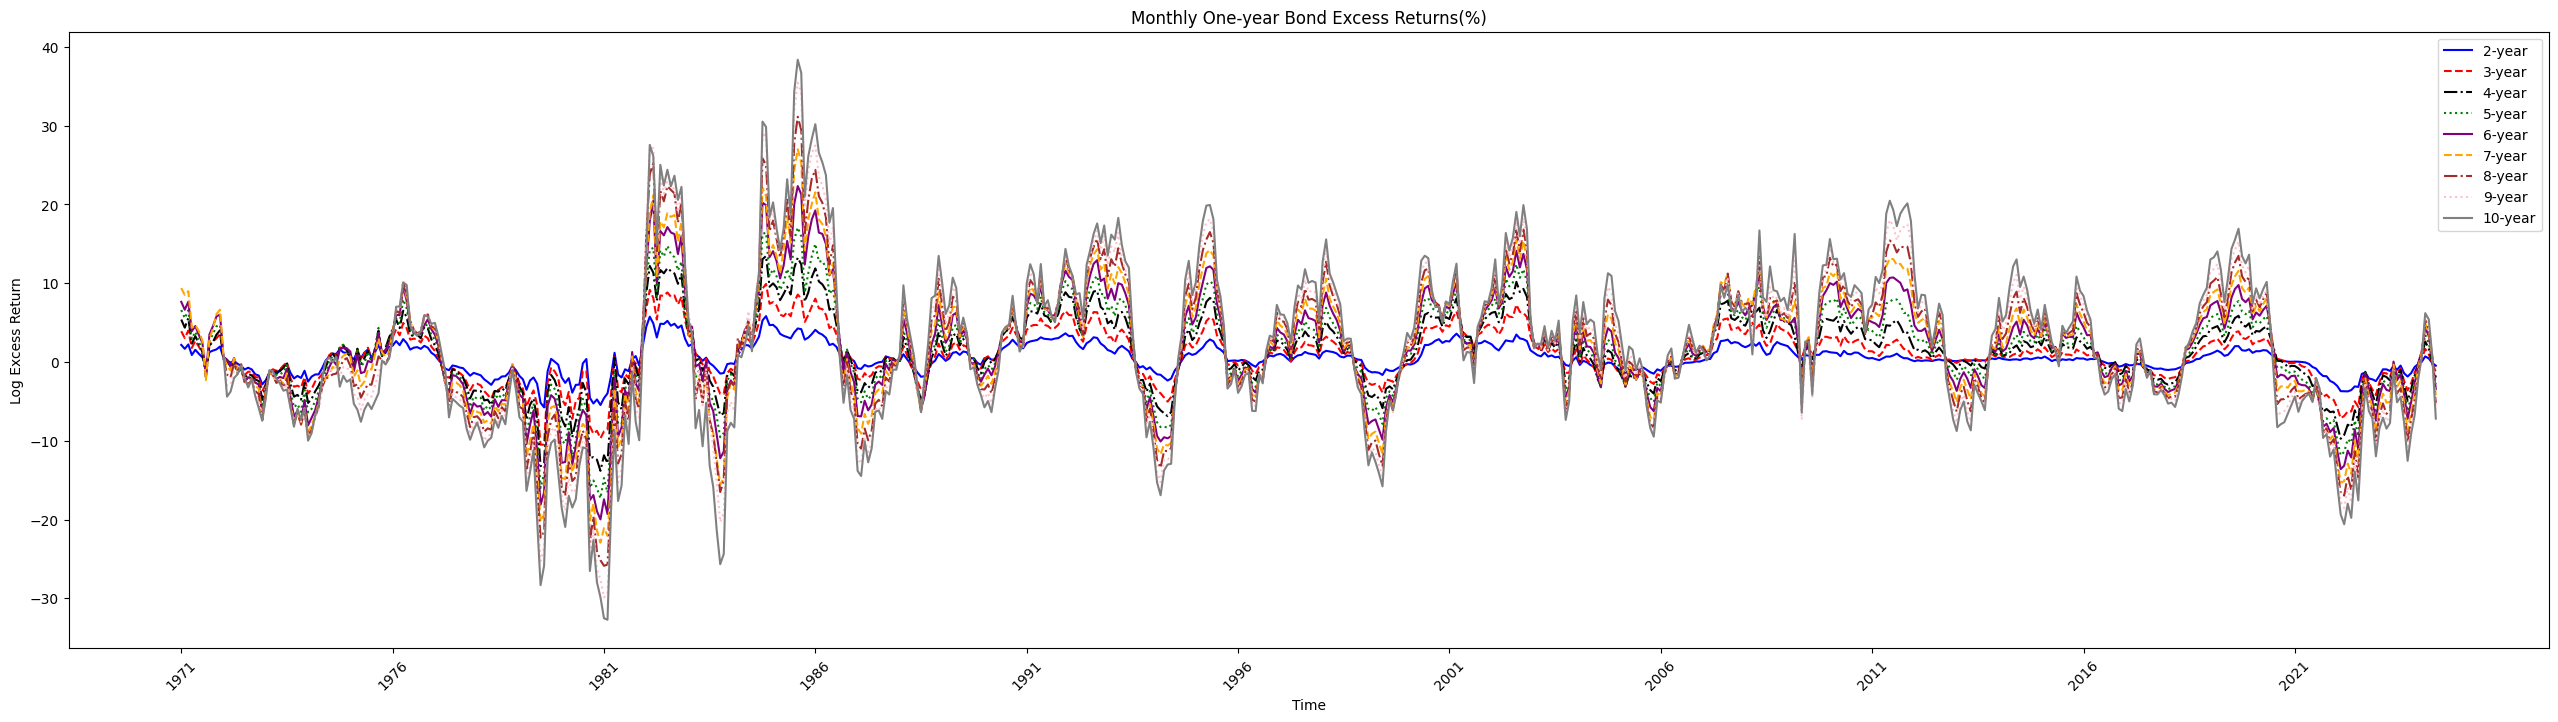

,xr_2,xr_3,xr_4,xr_5,xr_6,xr_7,xr_8,xr_9,xr_10
Time,,,,,,,,,
197208,0.499331,0.684442,0.254359,0.274655,0.636242,0.686741,0.557530,0.635338,0.867812
197209,0.198626,0.210033,0.127618,0.347236,0.295331,-0.443784,-1.601947,-2.967001,-4.399489
197210,-0.083483,-0.461766,-0.562464,-0.597276,-0.551070,-1.094858,-1.961943,-2.884040,-3.762544
197211,0.097346,0.012828,-0.237991,-0.106666,0.493500,0.437511,-0.208426,-1.105135,-2.041033
197212,-0.224676,-0.770867,-1.326938,-1.467363,-1.084877,-0.974783,-1.141833,-1.342498,-1.542689
...,...,...,...,...,...,...,...,...,...
202408,0.021335,0.401513,0.821427,1.085141,1.370846,1.160041,0.846109,0.840222,0.578854
202409,0.708615,1.650014,2.594728,3.450959,4.369065,4.887745,5.302345,5.867250,6.197847
202410,0.446686,0.989802,1.694714,2.394572,3.296718,3.751199,4.180889,4.882828,5.418210


In [14]:
#!! Caution : You must run all cells in order to get the correct output 
#calculate log excess return
for i in range(2,11):
    df[f'xr_{i}'] = -(i-1)* ( df[f'{(i-1)*12} m'] - df[f'{i*12} m'].shift(12) ) + ( df[f'{i*12} m'].shift(12) - df['12 m'].shift(12) ) #case for 1-year holding perido
    # df[f'xr_{i}'] = (-1)*(1/12)*(i*12-1)*( df[f'{(i*12-1)} m'] - df[f'{i*12} m'].shift(1) ) + (1/12)*( df[f'{i*12} m'].shift(1) - df['12 m'].shift(1) ) #case for 1 month holding period
# Time span
df = df.loc['197108':'202412']

years = df.index.str[:4]
tick_positions = [i for i in range(0, len(years), 60)]
tick_labels = [years[i] for i in tick_positions]

plt.figure(figsize=(32, 8))  
colors = ['blue', 'red', 'black', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-']  

for i in range(2, 11):
    plt.plot(df.index, df[f'xr_{i}'], label=f'{i}-year', color=colors[i-2], linestyle=linestyles[i-2])

plt.title('Monthly One-year Bond Excess Returns(%)')
plt.xlabel('Time')
plt.ylabel('Log Excess Return')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.legend()

plt.show()
exrets = df.loc[:,'xr_2':'xr_10']

exrets.dropna(axis=0, inplace=True)

exrets

In [15]:
exrets.dropna(axis=0, inplace=True)

exrets.index = pd.to_datetime(exrets.index, format='%Y%m').to_period('M')
exrets.index = (exrets.index - 12).strftime('%Y%m')

exrets

exrets.to_csv('exrets_19712023.csv')

In [16]:
exrets

,xr_2,xr_3,xr_4,xr_5,xr_6,xr_7,xr_8,xr_9,xr_10
Time,,,,,,,,,
197108,0.499331,0.684442,0.254359,0.274655,0.636242,0.686741,0.557530,0.635338,0.867812
197109,0.198626,0.210033,0.127618,0.347236,0.295331,-0.443784,-1.601947,-2.967001,-4.399489
197110,-0.083483,-0.461766,-0.562464,-0.597276,-0.551070,-1.094858,-1.961943,-2.884040,-3.762544
197111,0.097346,0.012828,-0.237991,-0.106666,0.493500,0.437511,-0.208426,-1.105135,-2.041033
197112,-0.224676,-0.770867,-1.326938,-1.467363,-1.084877,-0.974783,-1.141833,-1.342498,-1.542689
...,...,...,...,...,...,...,...,...,...
202308,0.021335,0.401513,0.821427,1.085141,1.370846,1.160041,0.846109,0.840222,0.578854
202309,0.708615,1.650014,2.594728,3.450959,4.369065,4.887745,5.302345,5.867250,6.197847
202310,0.446686,0.989802,1.694714,2.394572,3.296718,3.751199,4.180889,4.882828,5.418210


## Forward Rates (fwds)

$$f_t^{(n)} = -(n-1)y_t^{(n-1)} + ny_t^{(n)}$$ 

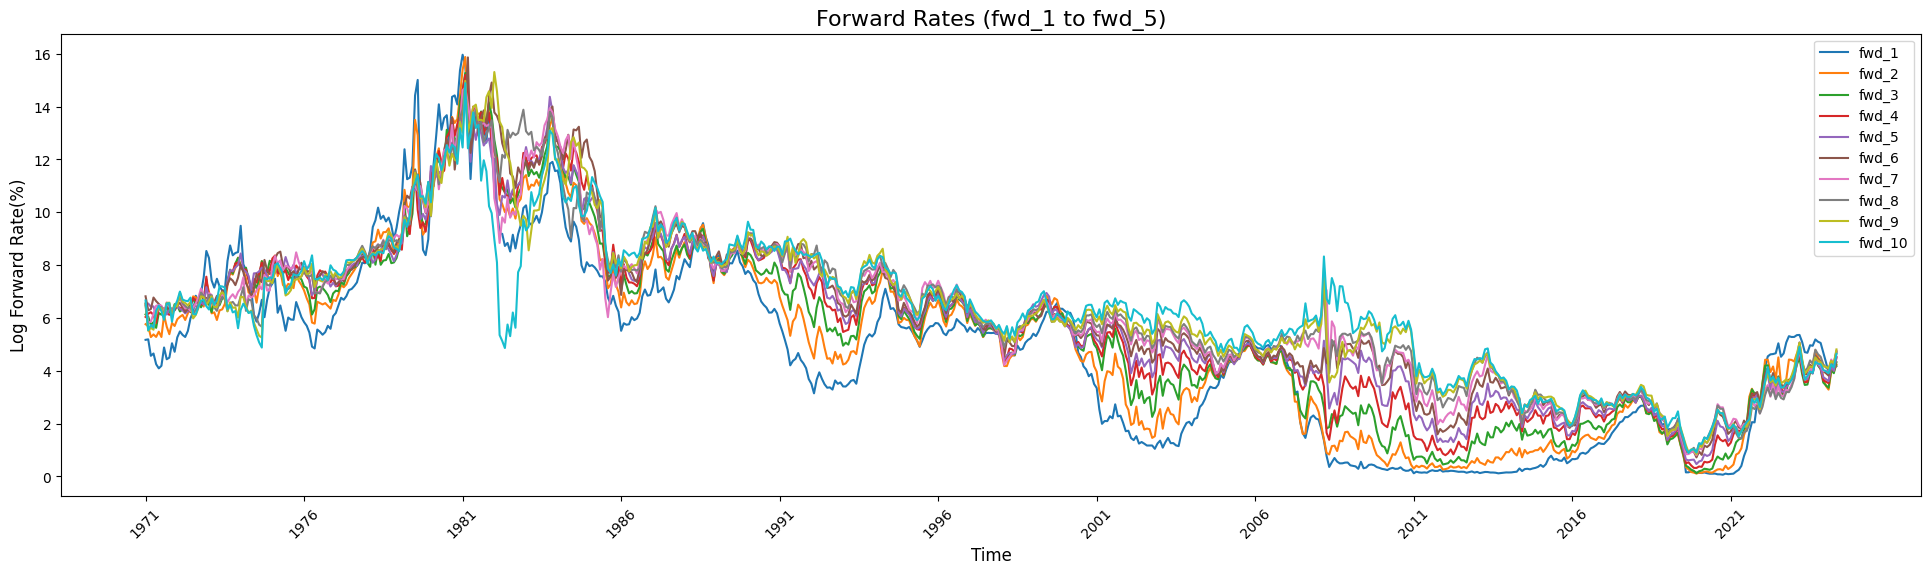

In [17]:
df['fwd_1'] = df['12 m']

for i in range(2,11):
    df[f'fwd_{i}'] = -(i-1)*df[f'{(i-1)*12} m'] + i*df[f'{i*12} m']

# Set a tick position every 5 years
years = df.index.str[:4]
tick_positions = [i for i in range(0, len(years), 60)]
tick_labels = [years[i] for i in tick_positions]

plt.figure(figsize=(24, 6))

for i in range(1, 11):
    plt.plot(df.index, df[f'fwd_{i}'], label=f'fwd_{i}')

plt.title('Forward Rates (fwd_1 to fwd_5)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.ylabel('Log Forward Rate(%)', fontsize=12)
plt.legend()

plt.show()

forward_rates = df.loc[:,'fwd_1':'fwd_10']
forward_rates.to_csv('fwds_19782023.csv')

## Realized Volatility (real_vol)

In [18]:
# df_daily.set_index('Time', inplace = True)
df_daily = pd.read_excel('Raw/LW_daily.xlsx')
df_daily = df_daily.rename(columns = {'Unnamed: 0' : 'Time'})
df_daily.columns = df_daily.columns.str.strip()

df_daily['Time'] = pd.to_datetime(df_daily['Time'], format = '%Y%m%d')

df_daily.set_index('Time', inplace=True)

df_daily_10yr = df_daily[['120 m']]
df_daily_10yr = df_daily_10yr['19710531':'20241231']*0.01

df_daily_10yr

,120 m
Time,
1971-06-01,NaN
1971-06-02,NaN
1971-06-03,NaN
1971-06-04,NaN
1971-06-07,NaN
...,...
2024-12-24,0.045420
2024-12-26,0.045293
2024-12-27,0.045793


In [19]:
df_daily_10yr.index = pd.to_datetime(df_daily_10yr.index)

df_daily_10yr['yc'] = (df_daily_10yr['120 m'] - df_daily_10yr['120 m'].shift(1))

df_daily_10yr.dropna(axis = 0, inplace= True)

df_daily_10yr['yc_sqaured'] = df_daily_10yr['yc']**2

num_days = df_daily_10yr['yc_sqaured'].resample('M').count()

m_var = df_daily_10yr['yc_sqaured'].resample('M').sum()*100*252/num_days

real_vol = np.sqrt(m_var) 

# real_vol.to_csv('real_vol.csv')

real_vol.index = real_vol.index.strftime('%Y%m')
real_vol = real_vol[(real_vol.index >= '197108') & (real_vol.index <= '202312')]

real_vol
# monthly_sosr_sqrt = np.sqrt(monthly_sosr)

# real_vol = monthly_sosr_sqrt*np.sqrt(252/monthly_days)*10

# print(real_vol)

# df_realvol = pd.DataFrame(real_vol, index = 'Time')

Time
197108    0.062929
197109    0.065727
197110    0.040556
197111    0.091051
197112    0.036973
            ...   
202308    0.101763
202309    0.081434
202310    0.147587
202311    0.140768
202312    0.115060
Name: yc_sqaured, Length: 629, dtype: float64

In [20]:
real_vol.to_csv('real_vol_19712023.csv', index=True, header=True)    

## Yield level, Slope, Level and Curvature (yl, sl, lv, cv)

In [28]:
df = pd.read_excel('Raw/LW_monthly.xlsx')
df = df.rename(columns = {'Unnamed: 0' : 'Time'})
df.columns = df.columns.str.strip() #Stripping whitespace from column names

df['Time'] = df['Time'].astype(str)

df.set_index('Time', inplace = True)

yl = df[['12 m', '24 m', '36 m', '48 m', '60 m', '72 m', '84 m', '96 m','108 m','120 m']].copy()
yl = yl.loc['197108':'202312']
yl.to_csv('yl_all_19782023.csv', index=True, header=True)


# yl['slope'] = yl['120 m'] - yl['24 m']

# yl['level'] = (yl['120 m']+yl['60 m']+yl['24 m'])/3

# yl['curvature'] = (yl['120 m']+yl['24 m'])/2 - yl['60 m']

# lsc = yl[['slope', 'level', 'curvature']].copy()

# lsc.to_csv('lsc_19712018.csv', index=True, header=True)

lsc

,slope,level,curvature
Time,,,
197108,0.799714,5.886121,-0.061747
197109,0.401784,5.734200,-0.288277
197110,0.820874,5.434275,-0.312132
197111,0.809756,5.506264,-0.263977
197112,1.119187,5.353805,-0.092523
...,...,...,...
202308,-0.763449,4.366180,0.202251
202309,-0.479248,4.698214,0.175764
202310,-0.147217,4.917405,0.123386


## MacroFactors(Ludvisgon and Ng, 2009)

In [22]:
df = pd.read_excel('Raw/MacroFactors_2024Aug.xlsx')

df.set_index("Date", inplace=True)
df.index.name = "Time"

# YYYYMM 형식의 새로운 컬럼 추가
df["YYYYMM"] = df.index.strftime("%Y%m").astype(int)

# 197108 ~ 201912 범위의 데이터 필터링
filtered_df = df[(df["YYYYMM"] >= 197108) & (df["YYYYMM"] <= 202312)]
filtered_df.set_index("YYYYMM", inplace=True)
filtered_df.index.name = "Time"

filtered_df.to_csv('MacroFactors_19712023.csv')

# 결과 확인

## CP Factor (cp)

In [24]:
import pandas as pd
import statsmodels.api as sm

def compute_cp_factor_and_save_csv(exrets_path, fwds_path, output_csv_path):
    """
    exrets_path  : 예) 'exrets_19712018.csv' (열에 Time, xr_2..xr_10 포함)
    fwds_path    : 예) 'fwds_19712018.csv'   (열에 Time, fwd_1..fwd_10 포함)
    output_csv_path : 결과를 저장할 CSV 파일 경로
    """

    # 1. CSV 읽기
    df_exrets = pd.read_csv(exrets_path)
    df_fwds   = pd.read_csv(fwds_path)

    # 2. 'Time' 열을 인덱스로 설정
    #    -> ex: "Time"이 '199001', '199002'... 처럼 문자열로 있을 때 그대로 사용
    # 만약 float/int 형태이면 str 변환이 필요할 수도 있음. (예: df_exrets['Time'] = df_exrets['Time'].astype(str))
    df_exrets.set_index('Time', inplace=True)
    df_fwds.set_index('Time', inplace=True)

    # 3. 만기별 초과수익률/선도금리 컬럼 설정 (예: 2~10년, 1~10년)
    exret_cols = [f"xr_{m}" for m in range(2, 11)]  # xr_2..xr_10
    fwd_cols   = [f"fwd_{m}" for m in range(1, 11)] # fwd_1..fwd_10

    # 4. 슬라이싱 (존재하지 않는 열이 있을 시 KeyError 발생)
    exrets_data = df_exrets[exret_cols]
    fwds_data   = df_fwds[fwd_cols]

    # 5. 날짜(인덱스) 정렬: 두 DF가 공통된 Time 인덱스만 사용 (inner join)
    exrets_aligned, fwds_aligned = exrets_data.align(fwds_data, join='inner', axis=0)

    # 6. 초과수익률 평균 계산 (2~10년)
    exrets_mean = exrets_aligned.mean(axis=1)

    # 7. 선도금리에 상수항 추가
    X = sm.add_constant(fwds_aligned)
    y = exrets_mean

    # 8. OLS 적합
    model = sm.OLS(y, X, missing='drop').fit()

    # 9. CP factor 계산 (예측값) -> 이름 "CP"
    cp_values = model.predict(X)  # 시리즈/배열
    cp_factor = pd.Series(cp_values, index=X.index, name='CP')

    # 10. 결과 DataFrame 생성
    result_df = pd.DataFrame(cp_factor)

    # 인덱스 이름을 'Time'으로 설정해 CSV에 첫 열로 기록되도록 함
    result_df.index.name = 'Time'

    # 11. CSV 저장 (인덱스 포함)
    #     => 저장 후 확인해보면 첫 컬럼이 "Time", 두 번째가 "CP"가 됩니다.
    result_df.to_csv(output_csv_path, index=True)

    return cp_factor, model


if __name__ == "__main__":
    exrets_file = "19712023/exrets_19712023.csv"
    fwds_file   = "19712023/fwds_19712023.csv"
    output_csv  = "cp_factor_19712023.csv"

    cp_factor, ols_model = compute_cp_factor_and_save_csv(exrets_file, fwds_file, output_csv)

    # 회귀 요약
    print(ols_model.summary())
    print("\n[CP factor 상위 5개]\n", cp_factor.head())
    print(f"\nCSV '{output_csv}' 에 'Time' 인덱스 & 'CP' 컬럼 저장 완료.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     20.36
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           9.30e-33
Time:                        18:53:10   Log-Likelihood:                -1964.0
No. Observations:                 629   AIC:                             3950.
Df Residuals:                     618   BIC:                             3999.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0822      0.686     -4.495      0.0

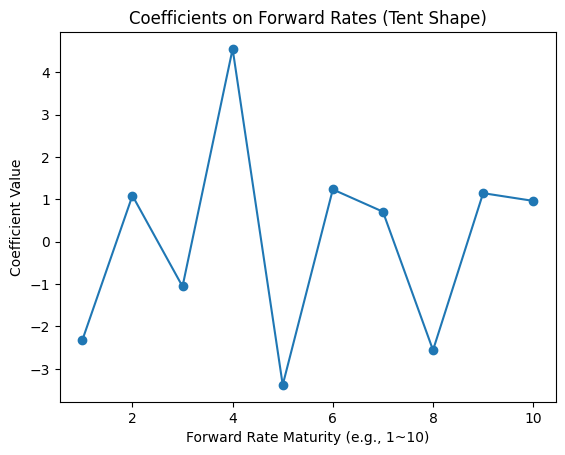

In [25]:
import matplotlib.pyplot as plt

# 1. OLS 모델에서 추정된 계수 가져오기
#    (예: ols_model = sm.OLS(y, X).fit()로 얻은 결과)
coeffs = ols_model.params

# 2. const(절편)는 제외하고, fwd_1 ~ fwd_n 계수만 남긴다
#    예: fwd_1, fwd_2, ..., fwd_10
coeffs_fwd = coeffs.drop('const', errors='ignore')  # 혹은 명시적으로 drop('const')

# 3. 계수들의 인덱스를 정렬(1,2,3,... 형태)하여 x축으로 삼는다
#    (이미 fwd_1, fwd_2 식으로 있으면 문자열로도 가능하지만, 
#     시각적 편의를 위해 int 혹은 float 인덱스로 변환 가능)
#    예: index가 ['fwd_1','fwd_2',...] 라면:
#         "1,2,..." 로 변환
new_index = []
for c in coeffs_fwd.index:
    # 'fwd_1' 처럼 되어 있다면 뒤의 숫자만 가져오기
    # fwd_ -> 4글자니까 c[4:] 로 숫자부분 파싱
    maturity = int(c[4:])
    new_index.append(maturity)

# Series의 인덱스 교체(정렬이 꼬일 수 있으므로 sort_values 기반으로 정렬)
coeffs_fwd.index = new_index
coeffs_fwd = coeffs_fwd.sort_index()

# 4. 차트로 시각화
plt.plot(coeffs_fwd.index, coeffs_fwd.values, marker='o')  # 라인 차트
plt.title("Coefficients on Forward Rates (Tent Shape)")
plt.xlabel("Forward Rate Maturity (e.g., 1~10)")
plt.ylabel("Coefficient Value")

plt.show()

# Implied Volatility

In [7]:
import pandas as pd

# 1) CSV 읽기 (날짜는 TradeDate 열: 정수형 YYYYMMDD)
df = pd.read_csv("Raw/ATM_IV_40D.csv")

# 2) 날짜를 정확한 포맷으로 파싱
df["TradeDate"] = pd.to_datetime(df["TradeDate"].astype(str), format="%Y%m%d")

# 3) 날짜를 인덱스로 설정
df = df.set_index("TradeDate")

# 4) 월말 기준으로 리샘플하여 각 달의 마지막 값 사용 (값 없으면 NaN 유지)
df_m = df.resample("M").last()

# 5) 인덱스를 YYYYMM 문자열로 변환하고 이름을 Time으로 지정
df_m.index = df_m.index.strftime("%Y%m")
df_m.index.name = "Time"

# 6) 저장 (원하면 생략)
df_m.to_csv("ATM_IV_40D_transformed.csv")

/var/folders/bt/j4f5qbn97ns0fmcff8_965z00000gn/T/ipykernel_18879/2793578614.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_m = df.resample("M").last()
